# Importing Libraries & Loading Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.feature_selection import f_classif
from sklearn.cluster import AgglomerativeClustering
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, mannwhitneyu
import pickle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, precision_recall_curve,
                            accuracy_score, precision_score, recall_score, f1_score)
import pickle
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization,
                                     Input, Concatenate, LeakyReLU)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from time import time

# Sklearn imports
from sklearn.model_selection import (StratifiedKFold, GridSearchCV, RandomizedSearchCV,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                            accuracy_score, precision_score, recall_score, f1_score,
                            roc_curve, make_scorer)
# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
df = pd.read_csv('/content/sonar1.csv')
print("Shape:", df.shape)
df.head()

Shape: (208, 62)


,Unnamed: 0,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,...,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,class
0,0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Data Overview & Missing value check

In [ ]:
print(df.info())

print("\n--- Missing values ---")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\n--- Target column preview ---")
print(df.iloc[:, -1].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   208 non-null    int64  
 1   Attribute1   208 non-null    float64
 2   Attribute2   208 non-null    float64
 3   Attribute3   208 non-null    float64
 4   Attribute4   208 non-null    float64
 5   Attribute5   208 non-null    float64
 6   Attribute6   208 non-null    float64
 7   Attribute7   186 non-null    float64
 8   Attribute8   208 non-null    float64
 9   Attribute9   208 non-null    float64
 10  Attribute10  208 non-null    float64
 11  Attribute11  208 non-null    float64
 12  Attribute12  203 non-null    float64
 13  Attribute13  208 non-null    float64
 14  Attribute14  208 non-null    float64
 15  Attribute15  208 non-null    float64
 16  Attribute16  208 non-null    float64
 17  Attribute17  208 non-null    float64
 18  Attribute18  208 non-null    float64
 19  Attribut

#Advanced EDA & Visualization

/tmp/ipython-input-1440207085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


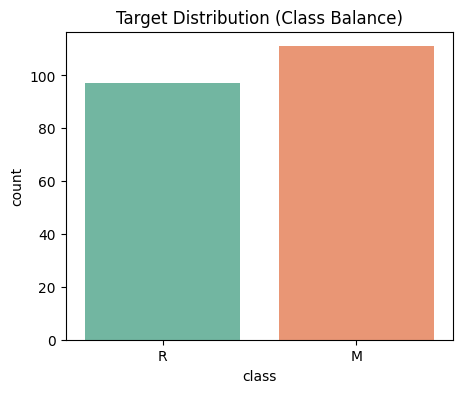

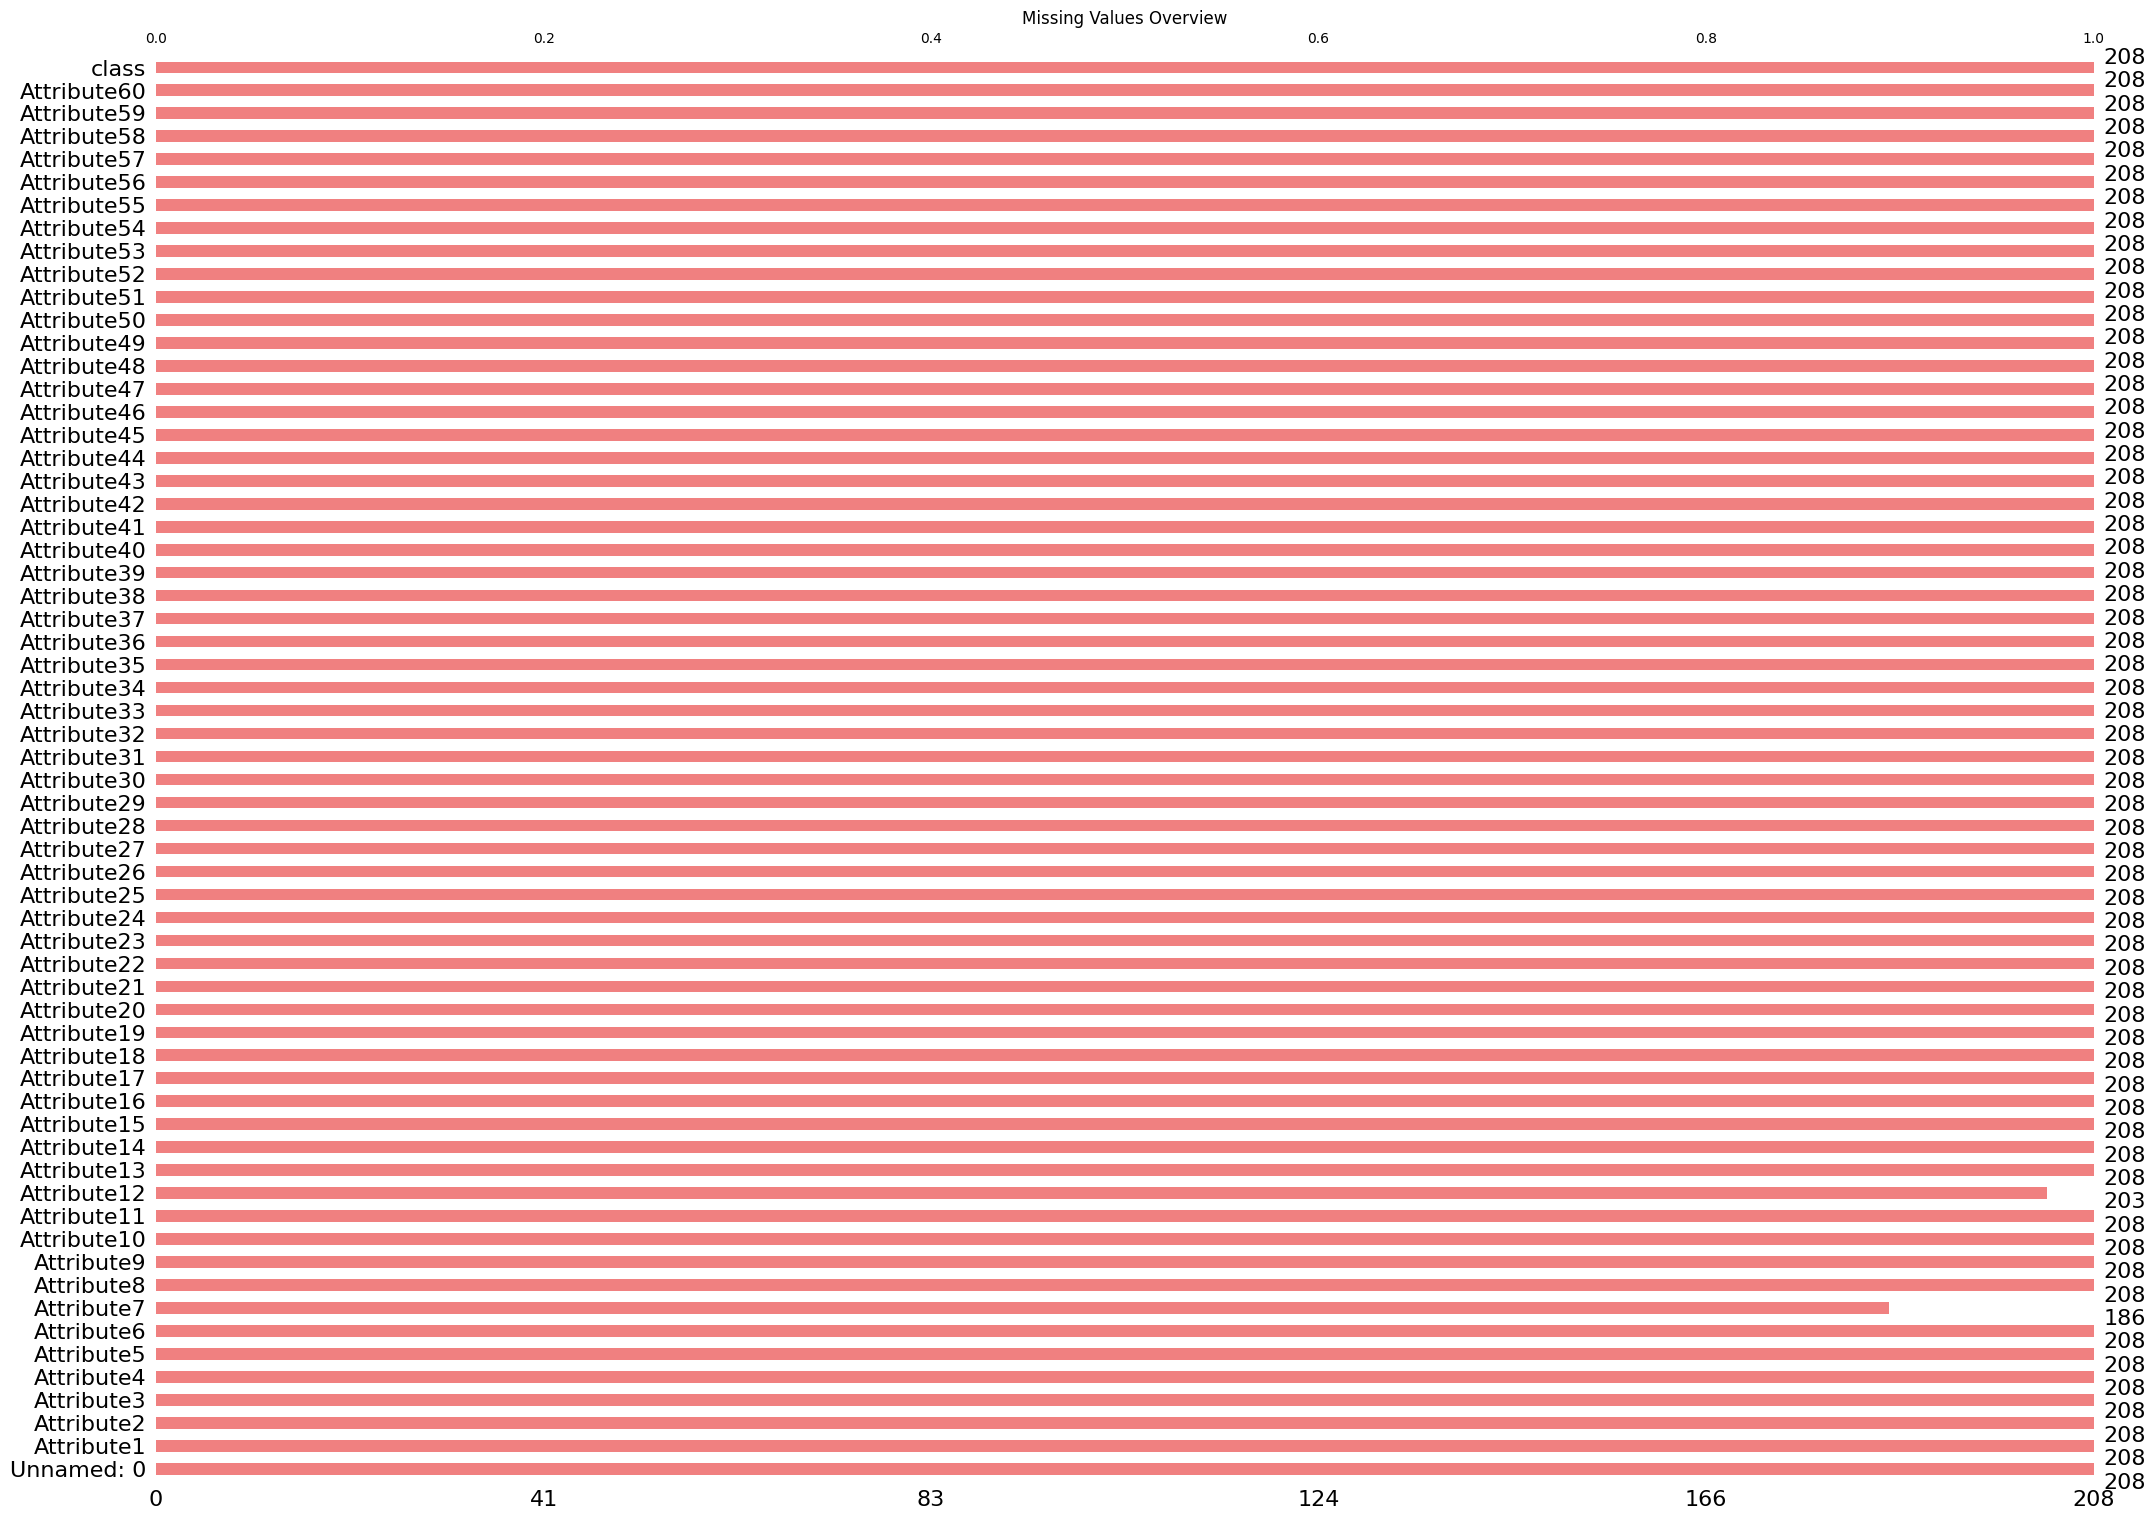

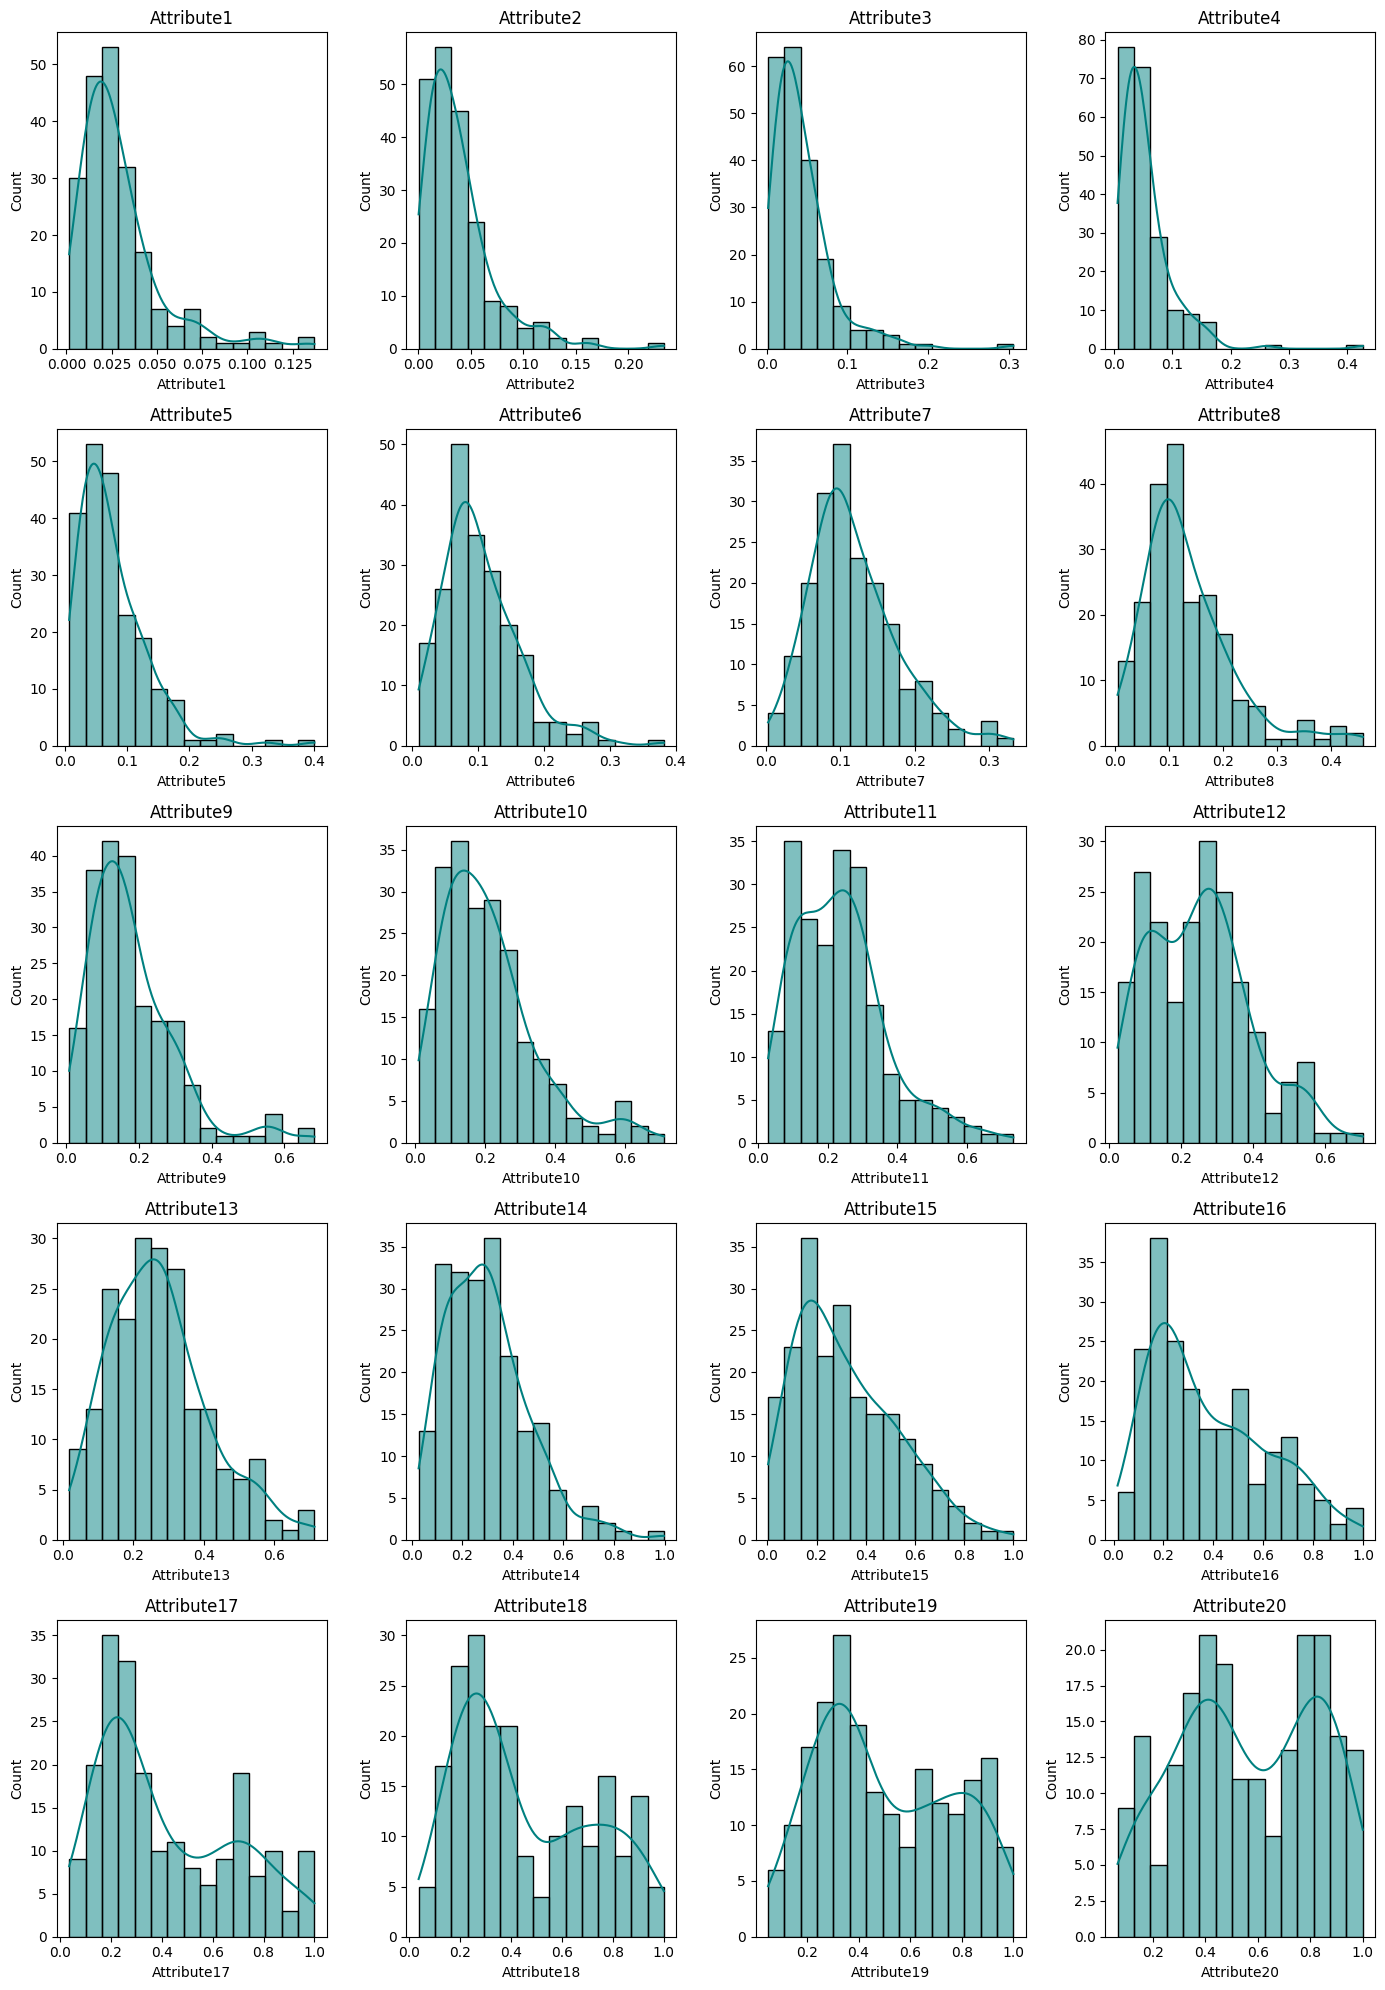

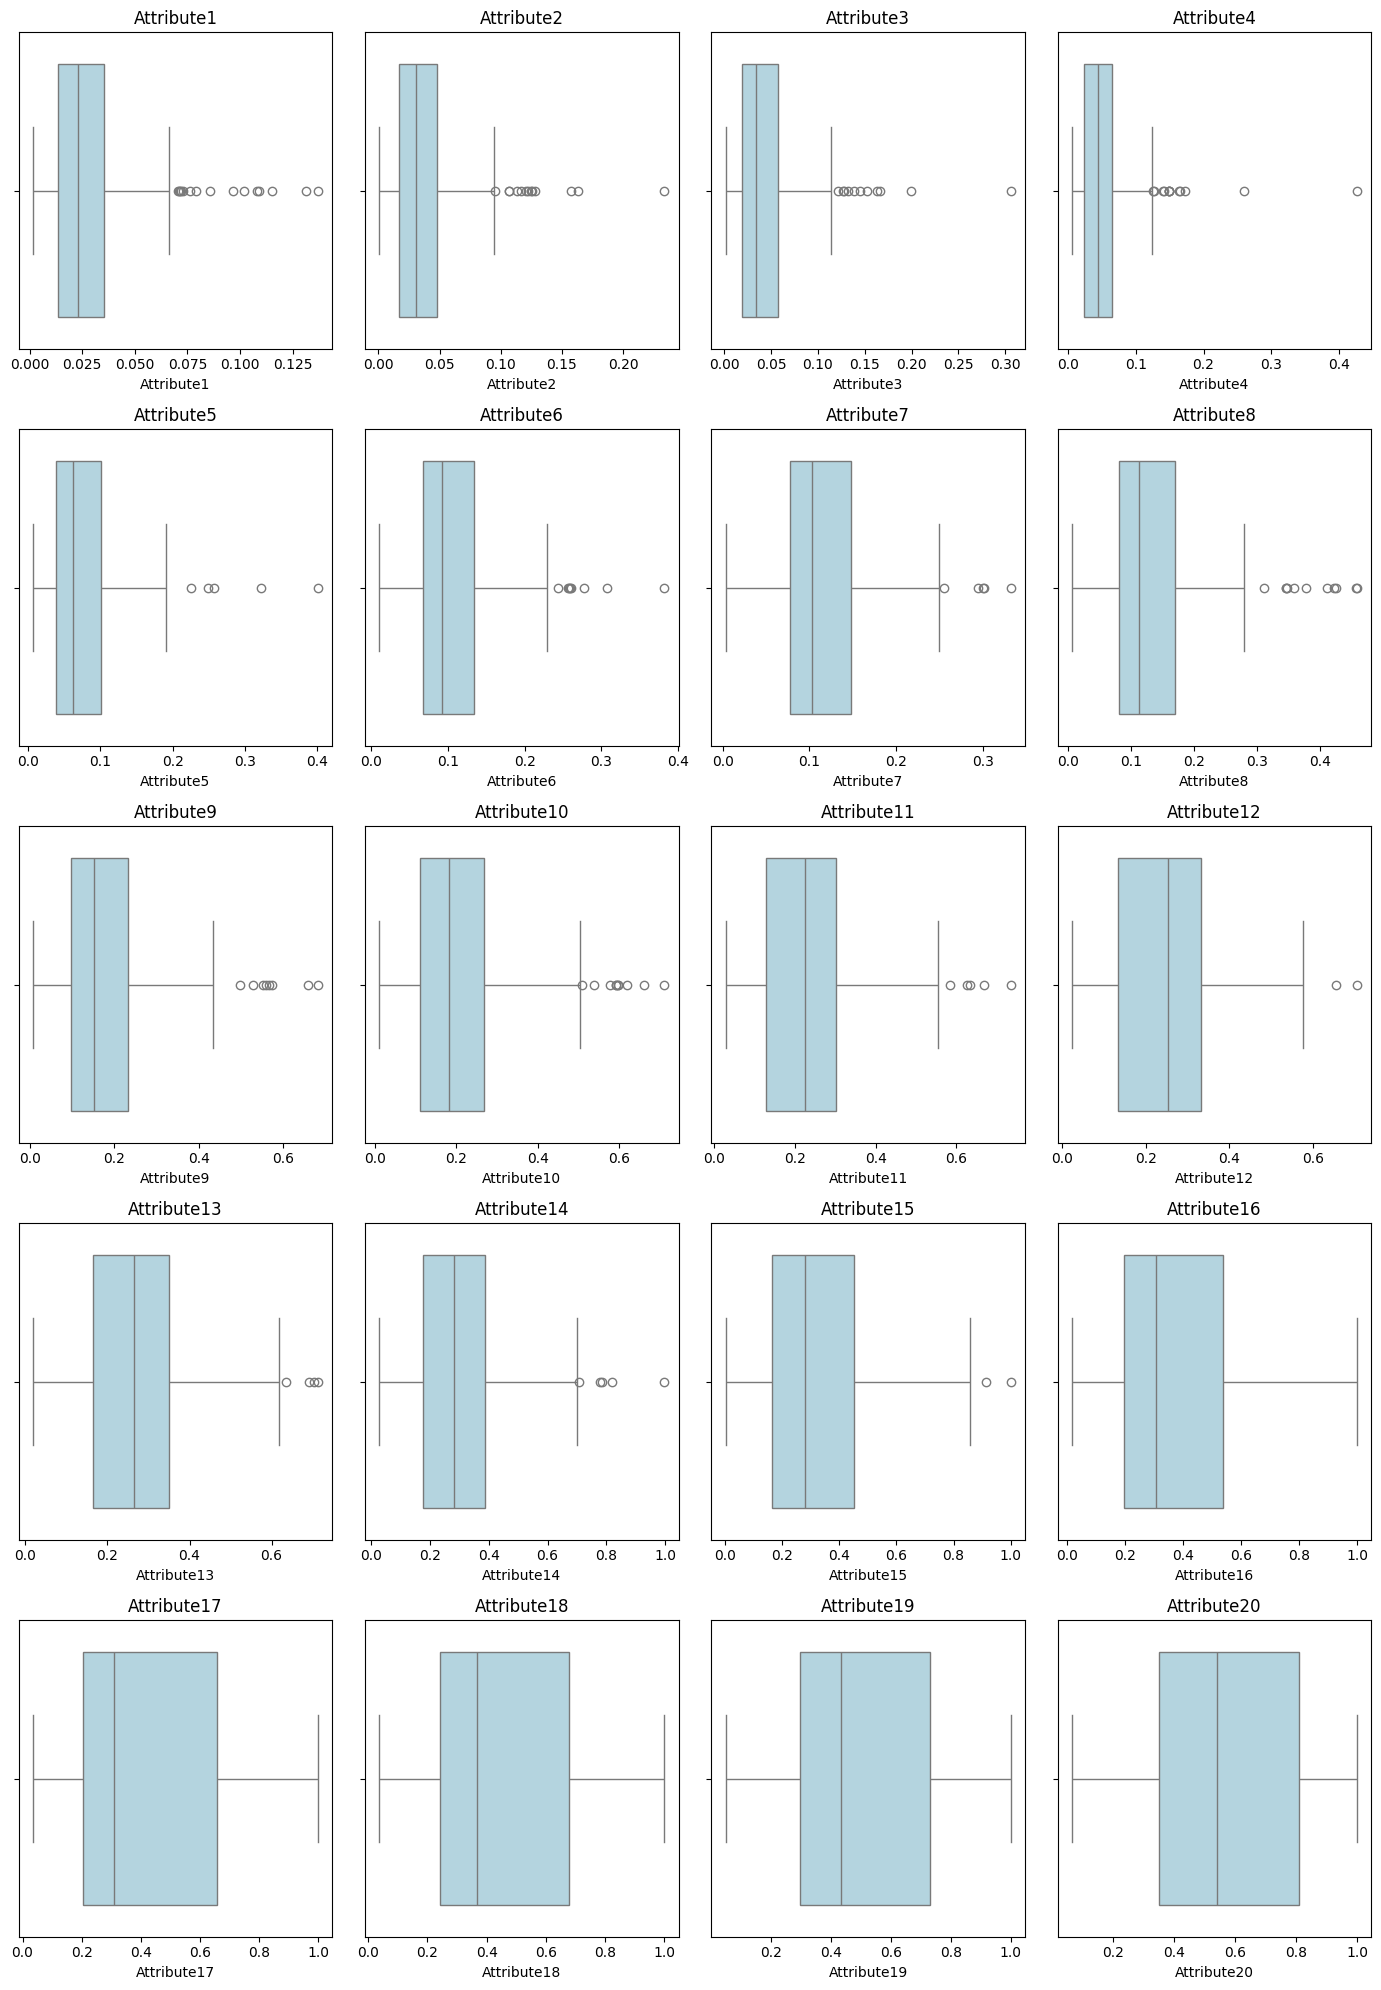

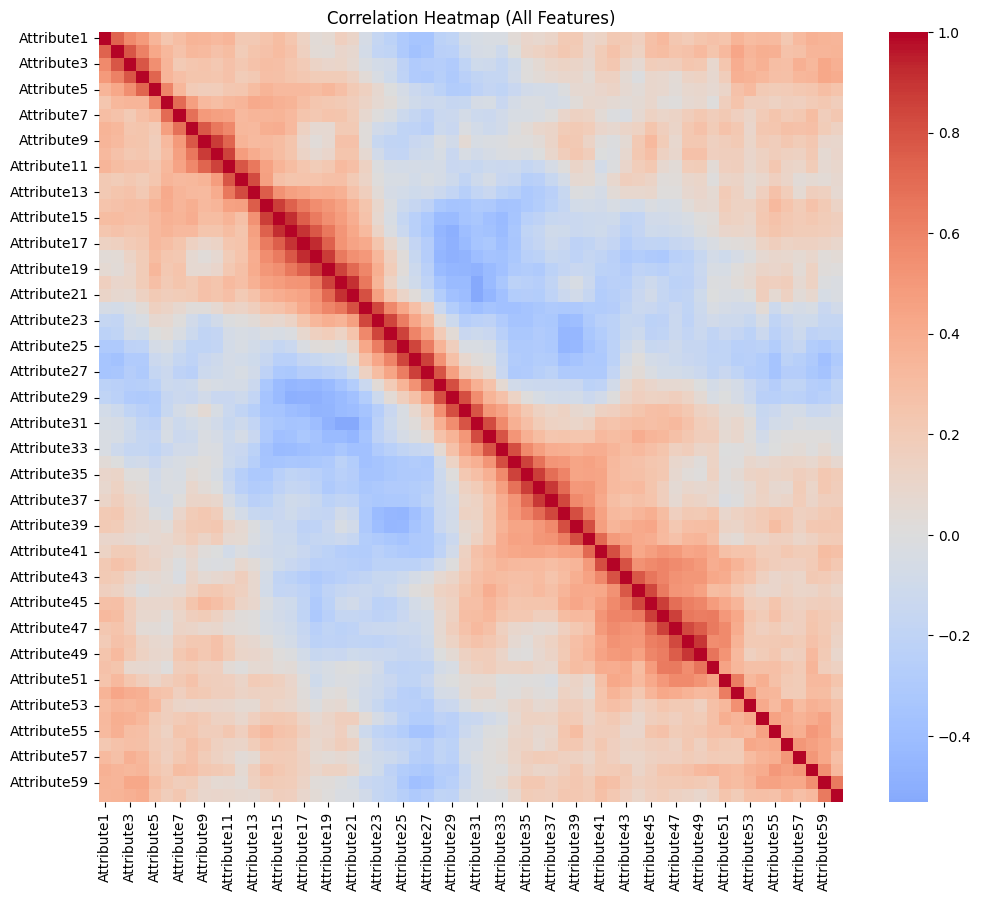

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Attribute1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371,2.131088,5.590145
Attribute2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339,2.155644,7.091235
Attribute3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059,2.652518,11.669560
Attribute4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264,3.401697,20.736121
Attribute5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010,2.018141,7.044579
Attribute6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823,1.248166,2.572759
Attribute7,186.0,0.117660,0.058565,0.0033,0.077150,0.10265,0.148150,0.3322,0.956702,1.224422
Attribute8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590,1.481107,2.802407
Attribute9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828,1.633870,3.592943
Attribute10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106,1.281258,1.820620


In [ ]:
# Basic target balance - helps verify if the dataset is balanced or imbalanced.
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Target Distribution (Class Balance)")
plt.show()

# Missing Value Pattern
plt.figure(figsize=(6,3))
msno.bar(df, color='lightcoral')
plt.title("Missing Values Overview")
plt.show()

# Distribution plots for numeric features
numeric_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'Unnamed: 0']

plt.figure(figsize=(14, 20))
for i, col in enumerate(numeric_cols[:20]):  # first 20 attributes for readability
    plt.subplot(5,4,i+1)
    sns.histplot(df[col], bins=15, kde=True, color='teal')
    plt.title(col)
plt.tight_layout()
plt.show()

# Boxplots for outlier visualization
plt.figure(figsize=(14, 20))
for i, col in enumerate(numeric_cols[:20]):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation Heatmap - pairwise correlation coefficients between numeric features.
plt.figure(figsize=(12,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (All Features)")
plt.show()

# Summary Statistics - Helps assess data normality and understand feature behavior.
summary = df[numeric_cols].describe().T
summary['skewness'] = df[numeric_cols].skew()
summary['kurtosis'] = df[numeric_cols].kurt()
display(summary.head(15))


# Correlation Analysis & Mild Outlier Capping

#
To analyze inter-feature correlations (identify redundant variables) and handle extreme outliers using capping method to make the dataset more stable for modeling.

Number of highly correlated pairs (> 0.9): 3


,Feature_1,Feature_2,Correlation
0,Attribute16,Attribute15,0.912625
1,Attribute18,Attribute17,0.925836
2,Attribute21,Attribute20,0.905062


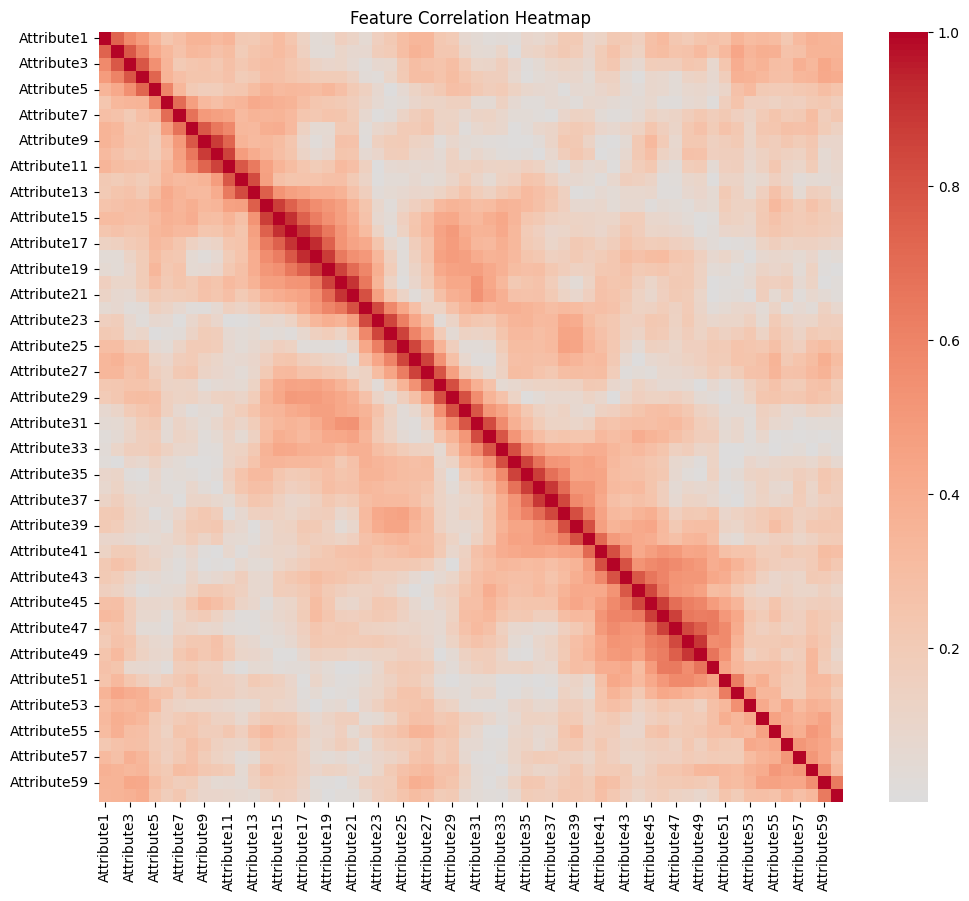


Capped 22 features for extreme outliers (>3*IQR):
  Attribute1: 5 extreme values capped
  Attribute2: 3 extreme values capped
  Attribute3: 2 extreme values capped
  Attribute4: 2 extreme values capped
  Attribute5: 2 extreme values capped
  Attribute6: 1 extreme values capped
  Attribute8: 2 extreme values capped
  Attribute9: 2 extreme values capped
  Attribute44: 1 extreme values capped
  Attribute45: 2 extreme values capped


In [ ]:
numeric_cols = [c for c in df.columns if df[c].dtype != 'object' and c not in ['Unnamed: 0']]

# Correlation analysis - Helps identify features that carry overlapping information.
corr_matrix = df[numeric_cols].corr().abs()

# Finding highly correlated pairs
high_corr_pairs = []
threshold = 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])
print(f"Number of highly correlated pairs (> {threshold}):", len(high_corr_df))
display(high_corr_df.head(20))

# Visualize correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# Outlier detection & selective capping
def mild_cap_outliers(df, cols, factor=3.0):
    capped_df = df.copy()
    capped_features = []
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if num_outliers > 0:
            capped_df[col] = np.where(df[col] > upper_bound, upper_bound,
                                      np.where(df[col] < lower_bound, lower_bound, df[col]))
            capped_features.append((col, num_outliers))
    return capped_df, capped_features

df_capped, capped_feats = mild_cap_outliers(df, numeric_cols, factor=3.0)
print(f"\nCapped {len(capped_feats)} features for extreme outliers (>3*IQR):")
for f, n in capped_feats[:10]:
    print(f"  {f}: {n} extreme values capped")

# Replace df with capped version for next steps
df = df_capped


# Statistical Significance Tests (t-test + Mann–Whitney)

To determine which numerical features show statistically significant differences between the two classes (‘R’ and ‘M’).
This helps identify the most discriminative features for model training.

=> t-test checks whether the means of two groups differ significantly.


=> Mann–Whitney U test is non-parametric and compares the medians.

In [ ]:
# Identify feature and target
target_col = 'class'
X = df.drop(columns=['class', 'Unnamed: 0'])
y = df[target_col].map({'R':0, 'M':1})  # Encode target

# Set Significance Level (α) and Bonferroni Correction
alpha = 0.05
n_features = X.shape[1]
bonf_alpha = alpha / n_features  # Bonferroni correction adjusts α for multiple comparisons to reduce false positives.

ttest_p, mw_p = [], []

# Apply Statistical Tests for Each Feature
for col in X.columns:
    x0 = X.loc[y == 0, col]  # Class R
    x1 = X.loc[y == 1, col]  # Class M

    # t-test (unequal variance)
    t_stat, p_t = stats.ttest_ind(x0, x1, equal_var=False, nan_policy='omit')

    # Mann–Whitney U test
    try:
        u_stat, p_mw = stats.mannwhitneyu(x0, x1, alternative='two-sided')
    except:
        p_mw = np.nan

    ttest_p.append(p_t)
    mw_p.append(p_mw)

# Combine and Evaluate results
sig_table = pd.DataFrame({
    'Feature': X.columns,
    'p_ttest': ttest_p,
    'p_mannwhitney': mw_p
})

sig_table['significant'] = (
    (sig_table['p_ttest'] <= bonf_alpha) |
    (sig_table['p_mannwhitney'] <= bonf_alpha)
)

sig_table = sig_table.sort_values('p_ttest')
print(f"Bonferroni corrected alpha: {bonf_alpha:.6f}")
print(f"Number of significant features: {sig_table['significant'].sum()} / {len(sig_table)}")

display(sig_table.head(15))


Bonferroni corrected alpha: 0.000833
Number of significant features: 22 / 60


,Feature,p_ttest,p_mannwhitney,significant
10,Attribute11,5.051763e-11,2.769640e-12,True
11,Attribute12,2.084660e-09,NaN,True
48,Attribute49,1.298489e-07,8.982416e-09,True
44,Attribute45,2.432426e-07,1.763598e-05,True
9,Attribute10,3.331079e-07,7.265821e-09,True
47,Attribute48,7.353774e-07,2.933241e-07,True
8,Attribute9,1.554940e-06,9.552838e-09,True
50,Attribute51,3.220727e-06,7.204872e-07,True
45,Attribute46,3.828827e-06,3.324480e-06,True
12,Attribute13,4.653590e-06,3.610152e-07,True


# Remove Insignificant Features
To keep only the statistically significant features (from sig_table) and eliminate those that do not meaningfully distinguish between the two classes

In [ ]:
# df            -> original dataframe (with 'class' and 'Unnamed: 0')
# sig_table     -> dataframe with columns ['Feature','p_ttest','p_mannwhitney','significant']
# X, y          -> feature matrix and encoded target from previous step

# Check for Required Variables
if 'sig_table' not in globals():
    raise RuntimeError("sig_table not found. Re-run the statistical test cell to recreate sig_table before running this.")

# Identify Significant (those passes the stats test) and Insignificant Features
significant_feats = sig_table.loc[sig_table['significant'], 'Feature'].tolist()
insignificant_feats = sig_table.loc[~sig_table['significant'], 'Feature'].tolist()

# Create reduced dataframe keeping only significant features + target + Unnamed: 0
df_reduced = df[['Unnamed: 0'] + significant_feats + ['class']].copy()

# Print summary
print("Total original numeric features:", len(sig_table))
print("Significant features kept:", len(significant_feats))
print("Insignificant features removed:", len(insignificant_feats))
print("\nRemoved feature examples (first 20):")
print(insignificant_feats[:20])

print("\nReduced dataframe shape:", df_reduced.shape)
print("\nFirst 5 columns of reduced df:")
print(df_reduced.columns[:30].tolist())

# Save lists for next steps
kept_features = significant_feats
removed_features = insignificant_feats

pd.Series(kept_features, name='kept_features').to_csv('/content/kept_features.csv', index=False)
pd.Series(removed_features, name='removed_features').to_csv('/content/removed_features.csv', index=False)

# expose reduced X/y for next steps
# final feature matrix (X_reduced) and encoded target (y_reduced).
X_reduced = df_reduced.drop(columns=['Unnamed: 0', 'class'])
y_reduced = df_reduced['class'].map({'R':0, 'M':1})

Total original numeric features: 60
Significant features kept: 22
Insignificant features removed: 38

Removed feature examples (first 20):
['Attribute20', 'Attribute37', 'Attribute22', 'Attribute3', 'Attribute7', 'Attribute54', 'Attribute50', 'Attribute58', 'Attribute34', 'Attribute14', 'Attribute42', 'Attribute53', 'Attribute19', 'Attribute6', 'Attribute59', 'Attribute23', 'Attribute56', 'Attribute31', 'Attribute33', 'Attribute55']

Reduced dataframe shape: (208, 24)

First 5 columns of reduced df:
['Unnamed: 0', 'Attribute11', 'Attribute12', 'Attribute49', 'Attribute45', 'Attribute10', 'Attribute48', 'Attribute9', 'Attribute51', 'Attribute46', 'Attribute13', 'Attribute47', 'Attribute52', 'Attribute44', 'Attribute1', 'Attribute4', 'Attribute36', 'Attribute2', 'Attribute21', 'Attribute43', 'Attribute35', 'Attribute5', 'Attribute8', 'class']


# Scatterplots, Correlation Heatmap & Collinearity Check
To visualize relationships between significant features, identify multicollinearity, and ensure the remaining variables are independent enough for reliable model training.

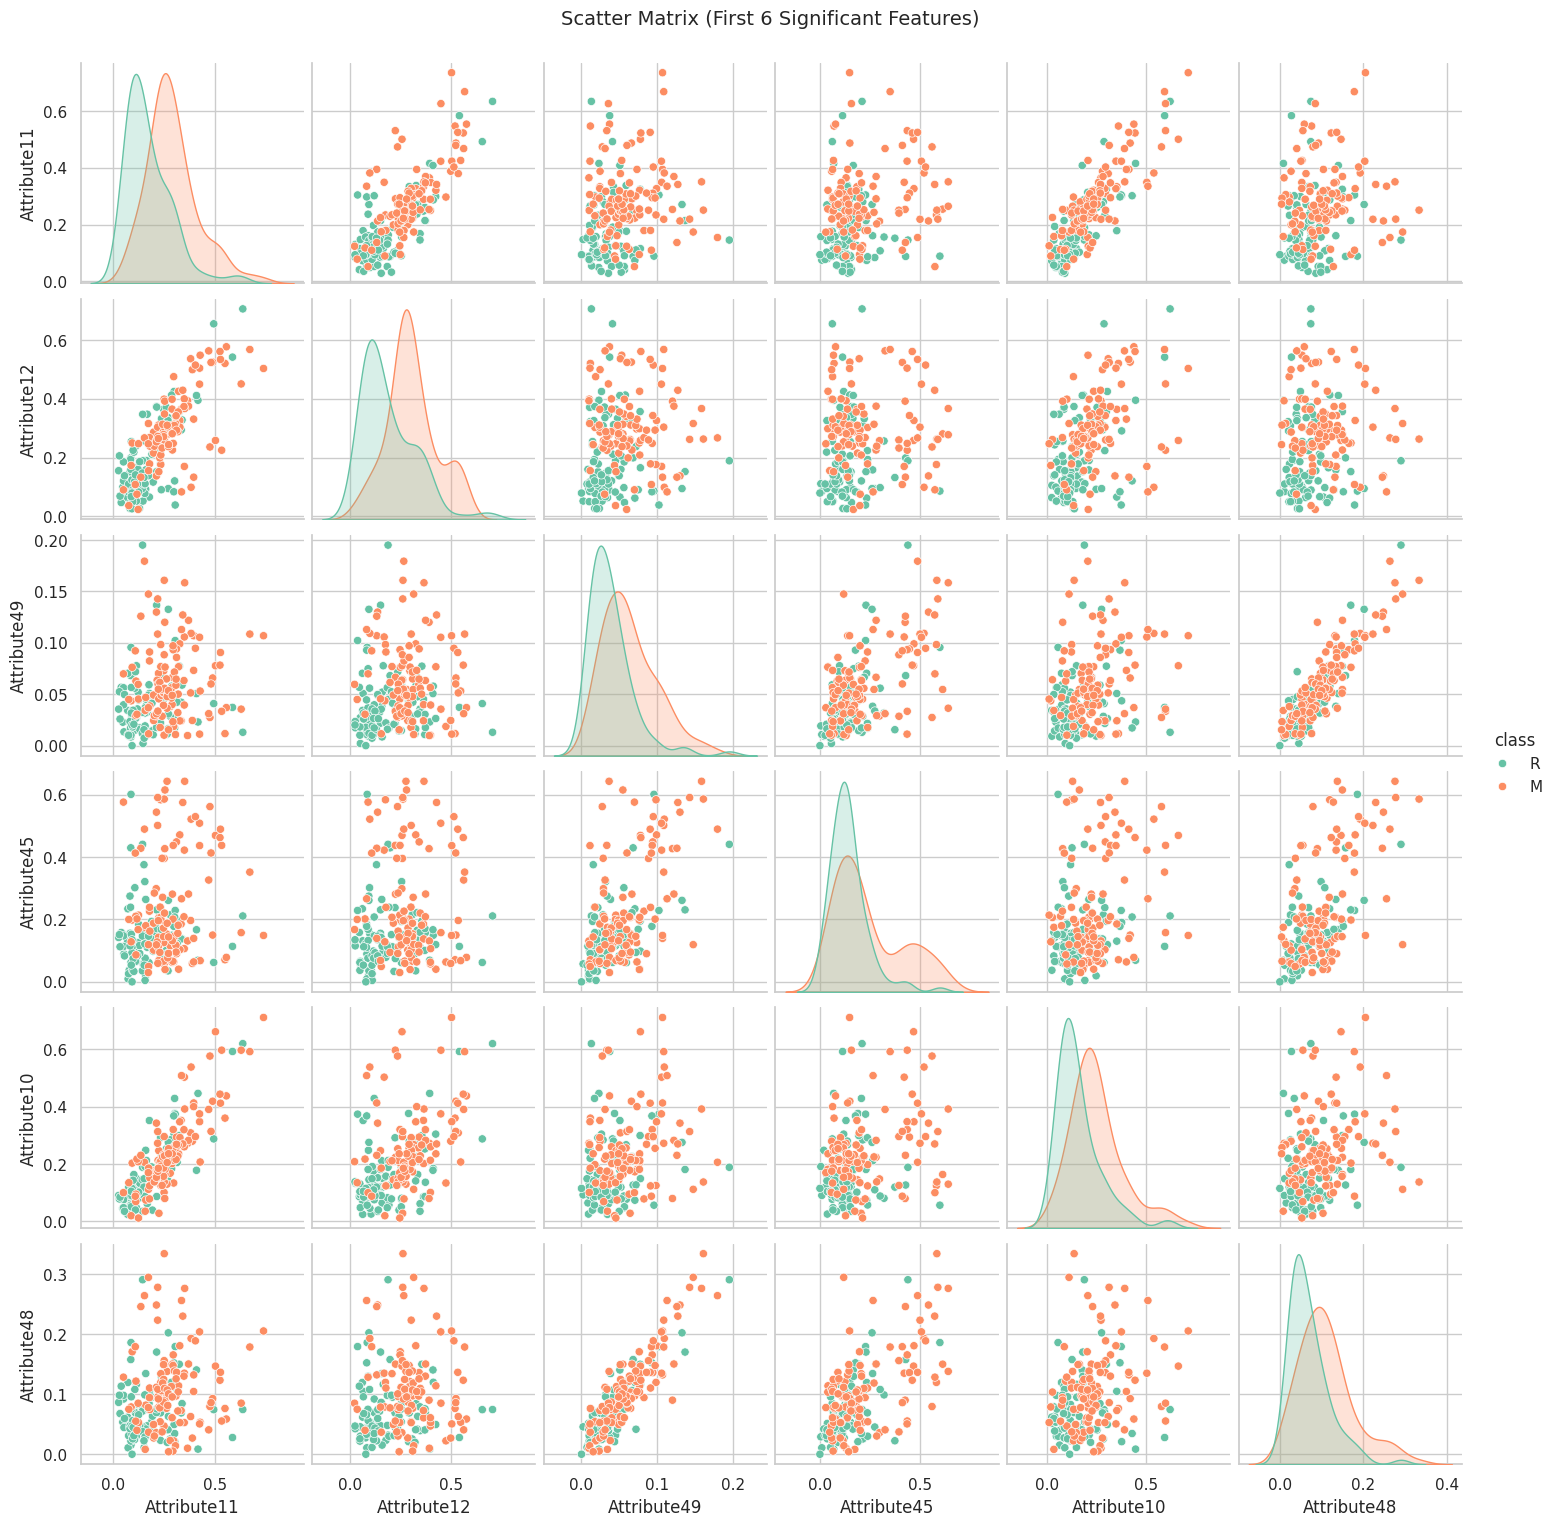

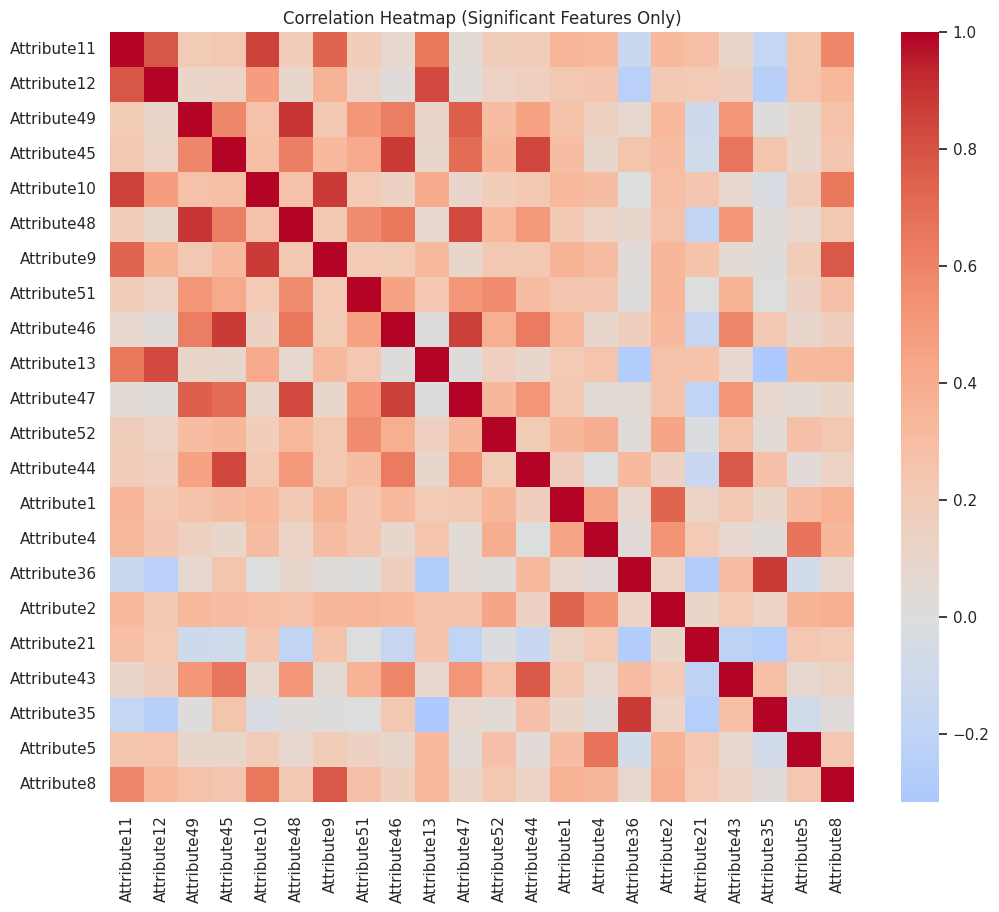

Number of highly correlated pairs (> 0.85): 6


,Feature_1,Feature_2,Correlation
0,Attribute10,Attribute11,0.853140
1,Attribute48,Attribute49,0.895484
2,Attribute9,Attribute10,0.879429
3,Attribute46,Attribute45,0.871585
4,Attribute47,Attribute46,0.856514
5,Attribute35,Attribute36,0.873337



--- Variance Inflation Factor (VIF) Results ---


,Feature,VIF
8,Attribute46,16.071907
3,Attribute45,14.263820
10,Attribute47,11.650064
0,Attribute11,11.253454
5,Attribute48,10.303800
4,Attribute10,9.743206
6,Attribute9,8.236373
12,Attribute44,7.376322
1,Attribute12,6.744422
2,Attribute49,6.195547


In [ ]:
# Prepare the data
feature_cols = [c for c in df_reduced.columns if c not in ['Unnamed: 0', 'class']]
X_sig = df_reduced[feature_cols]
y_sig = df_reduced['class'].map({'R':0, 'M':1})

# Scatter plots for first few features
sns.set(style="whitegrid", context="notebook")

# Sample 6x6 scatterplot grid for first 6 features to avoid clutter
subset_cols = feature_cols[:6]
sns.pairplot(df_reduced, vars=subset_cols, hue='class', palette='Set2', diag_kind='kde')
plt.suptitle("Scatter Matrix (First 6 Significant Features)", y=1.02, fontsize=14)
plt.show()

# Correlation Heatmap
corr = X_sig.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap (Significant Features Only)")
plt.show()

# Compute Pairwise Collinearity
high_corr_pairs = []
#Detect Highly Correlated Feature Pairs
threshold = 0.85
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])
print(f"Number of highly correlated pairs (> {threshold}):", len(high_corr_df))
display(high_corr_df.head(15))

# Variance Inflation Factor (VIF)
# Drop rows with NaNs for VIF calculation
X_sig_cleaned = X_sig.dropna()

# Scale the data for VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sig_cleaned)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_sig_cleaned.columns)

vif_df = pd.DataFrame()
vif_df['Feature'] = X_scaled_df.columns
vif_df['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]
vif_df = vif_df.sort_values(by='VIF', ascending=False)
print("\n--- Variance Inflation Factor (VIF) Results ---")
display(vif_df.head(20))

# Feature Clustering, Cluster-wise Imputation & Representative Feature Selection
To reduce redundancy among correlated features, and finally choose a representative feature from each cluster to form a compact, informative dataset.

Features considered for clustering: 22


/tmp/ipython-input-636359705.py:22: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist.values, method='average', metric='euclidean')


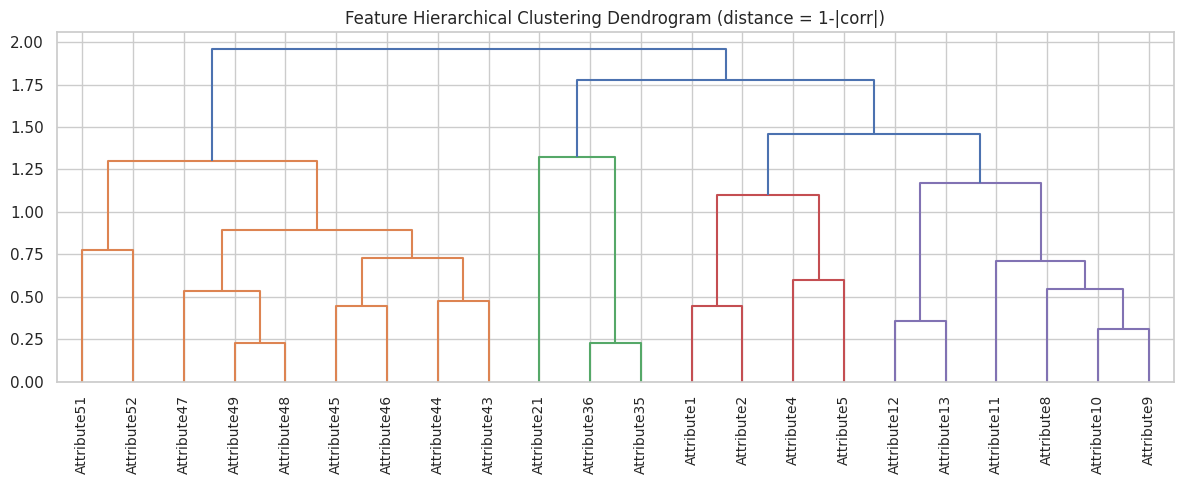


Number of clusters (threshold=0.45): 16
Cluster 1 (1 features): ['Attribute51']
Cluster 2 (1 features): ['Attribute52']
Cluster 3 (2 features): ['Attribute49', 'Attribute48']
Cluster 4 (1 features): ['Attribute47']
Cluster 5 (2 features): ['Attribute45', 'Attribute46']
Cluster 6 (1 features): ['Attribute44']
Cluster 7 (1 features): ['Attribute43']
Cluster 8 (2 features): ['Attribute36', 'Attribute35']
Cluster 9 (1 features): ['Attribute21']
Cluster 10 (2 features): ['Attribute1', 'Attribute2']
Cluster 11 (1 features): ['Attribute4']
Cluster 12 (1 features): ['Attribute5']
Cluster 13 (2 features): ['Attribute12', 'Attribute13']
Cluster 14 (2 features): ['Attribute10', 'Attribute9']
Cluster 15 (1 features): ['Attribute8']
Cluster 16 (1 features): ['Attribute11']

Missing values BEFORE imputation (per feature):


,0
Attribute12,5



Imputing cluster 13 (size=2), missing entries total = 5
  IterativeImputer applied to cluster 13.

Missing values AFTER imputation (per feature):


,0


Cluster 1 representative -> Attribute51
Cluster 2 representative -> Attribute52
Cluster 3 representative -> Attribute49
Cluster 4 representative -> Attribute47
Cluster 5 representative -> Attribute45
Cluster 6 representative -> Attribute44
Cluster 7 representative -> Attribute43
Cluster 8 representative -> Attribute36
Cluster 9 representative -> Attribute21
Cluster 10 representative -> Attribute1
Cluster 11 representative -> Attribute4
Cluster 12 representative -> Attribute5
Cluster 13 representative -> Attribute12
Cluster 14 representative -> Attribute10
Cluster 15 representative -> Attribute8
Cluster 16 representative -> Attribute11

Final dataframe shape (with representatives): (208, 18)
Representative features (final):
['Attribute51', 'Attribute52', 'Attribute49', 'Attribute47', 'Attribute45', 'Attribute44', 'Attribute43', 'Attribute36', 'Attribute21', 'Attribute1', 'Attribute4', 'Attribute5', 'Attribute12', 'Attribute10', 'Attribute8', 'Attribute11']


In [ ]:
# df_reduced : DataFrame with columns ['Unnamed: 0', <significant feature cols...>, 'class']
# sig_table  : DataFrame with columns ['Feature','p_ttest','p_mannwhitney','significant'] (from previous tests)

# Safety checks
if 'df_reduced' not in globals():
    raise RuntimeError("df_reduced not found in workspace. Recreate it from previous step before running this cell.")
if 'sig_table' not in globals():
    print("Warning: sig_table not found. Representative selection will use variance instead of p-values.")

# Prepare feature matrix (only numeric significant features)
feature_cols = [c for c in df_reduced.columns if c not in ['Unnamed: 0', 'class']]
X_sig = df_reduced[feature_cols].copy()  # keep copy for imputation

print("Features considered for clustering:", len(feature_cols))

# 1) Compute Correlation Distance & Perform Hierarchical Clustering
corr = X_sig.corr().abs()
dist = 1.0 - corr  # distance matrix

# linkage on the distance matrix: linkage expects either condensed or a 2D array of observations.
# We'll perform linkage on the correlation-based distance using features as observations:
Z = linkage(dist.values, method='average', metric='euclidean')

# Plot dendrogram (visual)
plt.figure(figsize=(12,5))
dendrogram(Z, labels=dist.index, leaf_rotation=90)
plt.title("Feature Hierarchical Clustering Dendrogram (distance = 1-|corr|)")
plt.tight_layout()
plt.show()

# Cut the dendrogram into clusters
cut_threshold = 0.45   # tuning knob — you can change (0.35..0.6) depending on desired granularity
clusters = fcluster(Z, t=cut_threshold, criterion='distance')
cluster_df = pd.DataFrame({'feature': dist.index, 'cluster': clusters})
cluster_groups = cluster_df.groupby('cluster')['feature'].apply(list).to_dict()

# Save cluster groups
pd.Series({k:','.join(v) for k,v in cluster_groups.items()}).to_csv('/content/clustered_feature_groups.csv', header=['features'])

print(f"\nNumber of clusters (threshold={cut_threshold}):", len(cluster_groups))
for k, v in cluster_groups.items():
    print(f"Cluster {k} ({len(v)} features): {v}")


# 2) Inspect missing values BEFORE imputation
missing_before = X_sig.isnull().sum()
print("\nMissing values BEFORE imputation (per feature):")
display(missing_before[missing_before>0].sort_values(ascending=False))


# 3) Cluster-wise imputation
X_imputed = X_sig.copy()

for cluster_id, features in cluster_groups.items():
    feat_list = list(features)
    # Count how many features in this cluster have any missing
    cluster_missing_counts = X_imputed[feat_list].isnull().sum().sum()
    if cluster_missing_counts == 0:
        continue  # nothing to impute in this cluster

    print(f"\nImputing cluster {cluster_id} (size={len(feat_list)}), missing entries total = {cluster_missing_counts}")

    if len(feat_list) >= 2:
        # Use IterativeImputer (BayesianRidge) over cluster features only
        imp = IterativeImputer(estimator=BayesianRidge(), max_iter=15, random_state=42, sample_posterior=False)
        # Fit on cluster subframe and transform
        sub = X_imputed[feat_list]
        # IterativeImputer requires numeric array; rows with all-nans are problematic - check and handle
        allnan_rows = sub.isnull().all(axis=1)
        if allnan_rows.any():
            # fill rows that are all-NaN with column medians temporarily
            medians = sub.median()
            sub = sub.fillna(medians)
            print(f"  Note: {allnan_rows.sum()} rows in cluster {cluster_id} had all-NaN; filled temporarily with medians for imputer.")
        try:
            sub_imputed = pd.DataFrame(imp.fit_transform(sub), columns=feat_list, index=sub.index)
            X_imputed.loc[:, feat_list] = sub_imputed
            print(f"  IterativeImputer applied to cluster {cluster_id}.")
        except Exception as e:
            print("  IterativeImputer failed for cluster", cluster_id, "-> falling back to cluster-wise median. Error:", e)
            X_imputed[feat_list] = sub.fillna(sub.median())
    else:
        # Single-feature cluster: impute by class-wise median if possible, else global median
        f = feat_list[0]
        num_missing = X_imputed[f].isnull().sum()
        print(f"  Single-feature cluster for {f} with {num_missing} missing values.")
        if num_missing > 0:
            # compute class-wise medians (ensure enough samples)
            df_temp = df_reduced[[f, 'class']].copy()
            medians_by_class = df_temp.groupby('class')[f].median()
            counts_by_class = df_temp.groupby('class')[f].count()
            # only use class-wise if class has at least 5 non-missing observations
            classwise_impute = {}
            for cls in medians_by_class.index:
                if counts_by_class[cls] >= 5:
                    classwise_impute[cls] = medians_by_class[cls]
            if classwise_impute:
                # apply class-wise median imputation
                def impute_row(val, cls):
                    if pd.isna(val):
                        if cls in classwise_impute:
                            return classwise_impute[cls]
                        else:
                            return df_temp[f].median()
                    else:
                        return val
                X_imputed[f] = [impute_row(v, c) for v, c in zip(df_reduced[f], df_reduced['class'])]
                print(f"  Used class-wise median imputation for {f}.")
            else:
                # fallback to global median
                X_imputed[f] = X_imputed[f].fillna(X_imputed[f].median())
                print(f"  Used global median for {f} (insufficient class-wise samples).")

# 4) Report missing values AFTER imputation
missing_after = X_imputed.isnull().sum()
print("\nMissing values AFTER imputation (per feature):")
display(missing_after[missing_after>0])  # ideally empty

# 5) Representative selection per cluster
rep_features = []
for cluster_id, features in cluster_groups.items():
    features = list(features)
    chosen = None
    # prefer the feature with lowest p_ttest in sig_table (if available)
    if 'sig_table' in globals():
        # create a small helper dict to map p-values (handle missing p-values)
        pmap = sig_table.set_index('Feature')['p_ttest'].to_dict()
        # filter only features present in pmap
        valid = [f for f in features if f in pmap and not pd.isna(pmap[f])]
        if valid:
            # pick feature with smallest p-value
            chosen = min(valid, key=lambda f: pmap[f])
    if chosen is None:
        # fallback: pick feature with highest variance (in the imputed data)
        variances = X_imputed[features].var()
        chosen = variances.idxmax()
    rep_features.append(chosen)
    print(f"Cluster {cluster_id} representative -> {chosen}")

# Save final representatives
pd.Series(rep_features, name='representative_feature').to_csv('/content/final_representative_features.csv', index=False)

# 6) Build final dataframe with representatives + Unnamed:0 + class
df_final = pd.concat([df_reduced[['Unnamed: 0', 'class']].reset_index(drop=True),
                      X_imputed[rep_features].reset_index(drop=True)], axis=1)

print("\nFinal dataframe shape (with representatives):", df_final.shape)
print("Representative features (final):")
print(rep_features)

# Save imputed dataset (representatives) for your inspection
df_final.to_csv('/content/df_imputed_representatives.csv', index=False)

# Expose variables for next steps
cluster_groups_dict = cluster_groups
representative_features = rep_features
X_imputed_full = X_imputed

# Variance Inflation Factor (VIF) Check for Final Representative Features
To detect multicollinearity among the final representative features selected from the previous step.

In [ ]:
# Prepare the final feature matrix (exclude 'Unnamed: 0' and 'class')
X_final = df_final.drop(columns=['Unnamed: 0', 'class'])
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_final), columns=X_final.columns)

# Compute VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

print("------ Variance Inflation Factor (VIF) Results ------")
display(vif_data)

# Identify features with potential multicollinearity
high_vif = vif_data[vif_data['VIF'] > 5]
if len(high_vif) == 0:
    print("\n No severe multicollinearity detected (all VIF <= 5).")
else:
    print(f"\n {len(high_vif)} features have VIF > 5 (potential multicollinearity):")
    display(high_vif)


------ Variance Inflation Factor (VIF) Results ------


,Feature,VIF
0,Attribute11,11.144780
1,Attribute10,6.159149
2,Attribute44,5.911106
3,Attribute45,5.784443
4,Attribute12,4.019076
5,Attribute47,3.765673
6,Attribute43,3.310499
7,Attribute49,2.890306
8,Attribute4,2.329405
9,Attribute8,2.007091



 4 features have VIF > 5 (potential multicollinearity):


,Feature,VIF
0,Attribute11,11.144780
1,Attribute10,6.159149
2,Attribute44,5.911106
3,Attribute45,5.784443


# Drop Features with High VIF and Recompute
To eliminate severe multicollinearity by removing features

In [ ]:
# Identify high-VIF features
high_vif_feats = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
print("Removing features with VIF > 10:", high_vif_feats)

# Drop high VIF features
X_vif_reduced = df_final.drop(columns=['Unnamed: 0', 'class'] + high_vif_feats)
scaler = StandardScaler()
X_scaled_reduced = pd.DataFrame(scaler.fit_transform(X_vif_reduced), columns=X_vif_reduced.columns)

# Recalculate VIFs
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_scaled_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_scaled_reduced.values, i)
                           for i in range(X_scaled_reduced.shape[1])]
vif_data_reduced = vif_data_reduced.sort_values('VIF', ascending=False).reset_index(drop=True)

print("------ Recomputed VIFs After Removing High-VIF Features ------")
display(vif_data_reduced)

# Identify any still problematic features
high_vif_reduced = vif_data_reduced[vif_data_reduced['VIF'] > 5]
if len(high_vif_reduced) == 0:
    print("\n All remaining features have acceptable multicollinearity (VIF ≤ 5).")
else:
    print(f"\n {len(high_vif_reduced)} features still have VIF > 5:")
    display(high_vif_reduced)


Removing features with VIF > 10: ['Attribute11']
------ Recomputed VIFs After Removing High-VIF Features ------


,Feature,VIF
0,Attribute44,5.911085
1,Attribute45,5.778451
2,Attribute47,3.732533
3,Attribute43,3.308504
4,Attribute49,2.889089
5,Attribute10,2.362203
6,Attribute4,2.318338
7,Attribute8,1.999928
8,Attribute51,1.943220
9,Attribute5,1.878281



 2 features still have VIF > 5:


,Feature,VIF
0,Attribute44,5.911085
1,Attribute45,5.778451


#Final Dataset after VIF-Based Feature Removal

In [ ]:
final_features = [f for f in df_final.columns if f not in ['Unnamed: 0', 'class', 'Attribute11']]
print("Final feature count:", len(final_features) - 1)  # excluding class column
print("Final feature list:\n", final_features)

# Create the final dataframe
df_final_vif = df_final.drop(columns=['Attribute11']).copy()

print("\n--- Final Dataset Head (first 5 rows) ---")
display(df_final_vif.head())


Final feature count: 14
Final feature list:
 ['Attribute51', 'Attribute52', 'Attribute49', 'Attribute47', 'Attribute45', 'Attribute44', 'Attribute43', 'Attribute36', 'Attribute21', 'Attribute1', 'Attribute4', 'Attribute5', 'Attribute12', 'Attribute10', 'Attribute8']

--- Final Dataset Head (first 5 rows) ---


,Unnamed: 0,class,Attribute51,Attribute52,Attribute49,Attribute47,Attribute45,Attribute44,Attribute43,Attribute36,Attribute21,Attribute1,Attribute4,Attribute5,Attribute12,Attribute10,Attribute8
0,0,R,0.0232,0.0027,0.0383,0.1051,0.2641,0.4256,0.2825,0.8507,0.5783,0.0200,0.0207,0.0954,0.1582,0.2111,0.1601
1,1,R,0.0125,0.0084,0.0409,0.0530,0.0621,0.1628,0.1401,0.4182,0.5212,0.0453,0.0689,0.1183,0.6552,0.2872,0.3481
2,2,R,0.0033,0.0232,0.0130,0.1348,0.2111,0.2222,0.2129,0.3043,0.7974,0.0262,0.1083,0.0974,0.7060,0.6194,0.3771
3,3,R,0.0241,0.0121,0.0681,0.2655,0.4295,0.3202,0.3210,0.3012,0.2741,0.0100,0.0205,0.0205,0.1992,0.1264,0.1276
4,4,R,0.0156,0.0031,0.0230,0.0357,0.0692,0.0841,0.1847,0.4181,0.4148,0.0762,0.0394,0.0590,0.3952,0.4459,0.2467
